 Create a robust Customer Segmentation system that analyzes customer data
 to categorize users into distinct segments based on their purchasing behavior,
 demographics, and other relevant factors. The goal is to provide businesses
 with valuable insights for targeted marketing strategies, personalized
 communication, and improved customer engagement

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [33]:
# Load the dataset
data = pd.read_csv('E-commerce.csv')

In [34]:
# Display the first few rows of the dataset
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [35]:
# Check for missing values
print(data.isnull().sum())


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [52]:
# Handle missing values (e.g., fill with median or mode)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['City'].fillna(data['City'].mode()[0], inplace=True)
data['Total Spend'].fillna(data['Total Spend'].median(), inplace=True)
data['Items Purchased'].fillna(data['Items Purchased'].median(), inplace=True)
data['Average Rating'].fillna(data['Average Rating'].median(), inplace=True)
data['Days Since Last Purchase'].fillna(data['Days Since Last Purchase'].median(), inplace=True)
data['Satisfaction Level'].fillna(data['Satisfaction Level'].mode()[0], inplace=True)

In [53]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [54]:
# Summary statistics
data.describe()


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

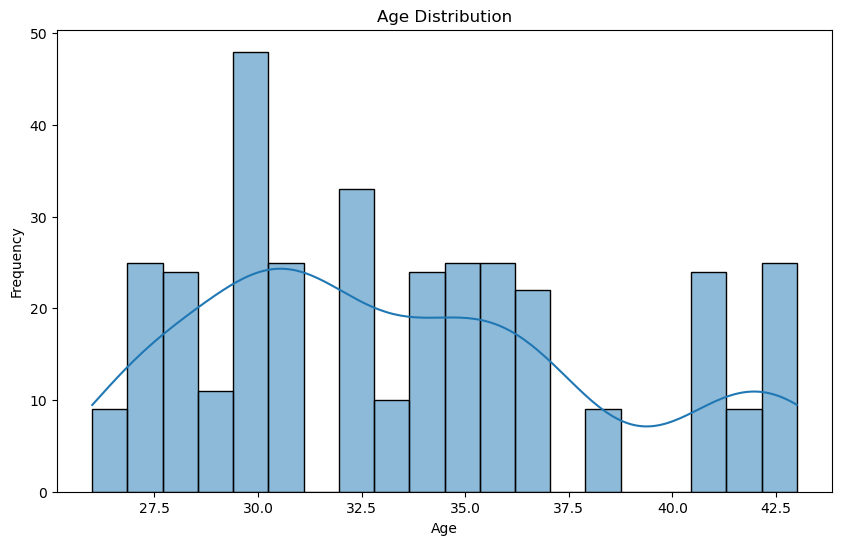

In [41]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

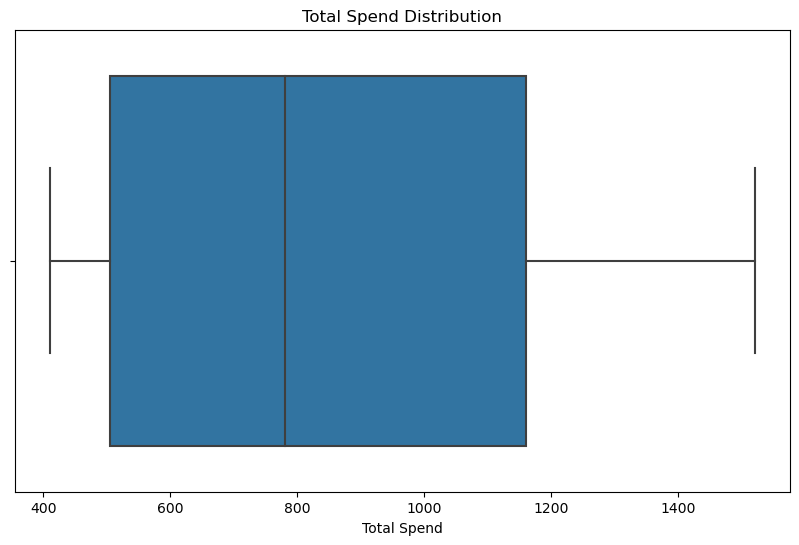

In [42]:
# Box plot for Total Spend
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total Spend', data=data)
plt.title('Total Spend Distribution')
plt.xlabel('Total Spend')
plt.show()

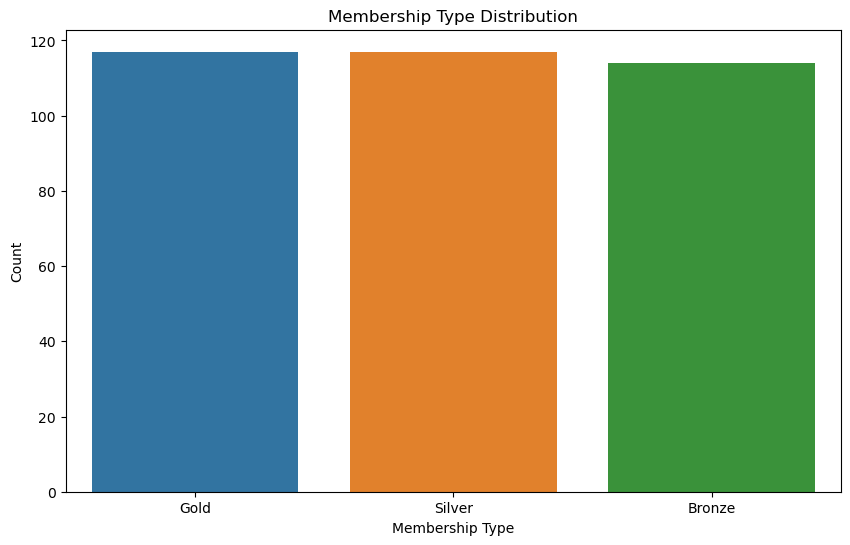

In [43]:
# Bar chart for Membership Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Membership Type', data=data)
plt.title('Membership Type Distribution')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.show()

In [44]:
numeric_data = data.select_dtypes(include=[float, int])

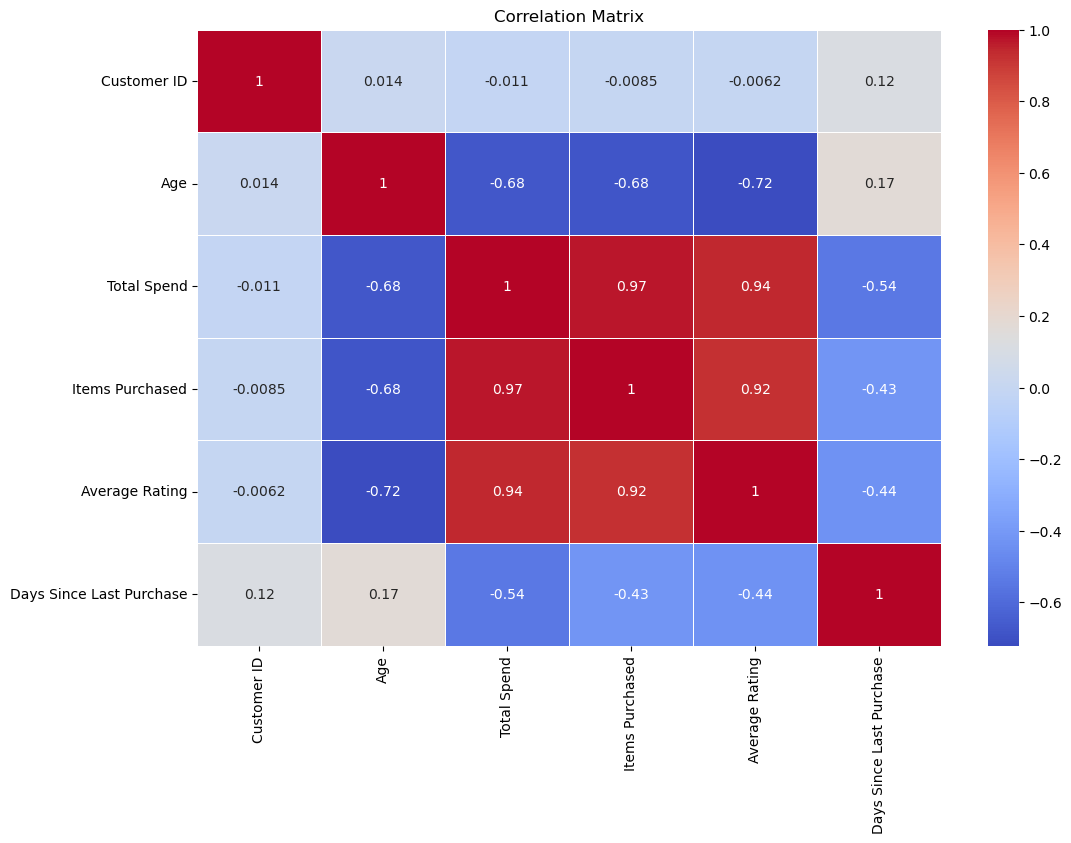

In [45]:
# Correlation matrix

corr_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [46]:
# Average Total Spend by Gender
gender_spend = data.groupby('Gender')['Total Spend'].mean()
print(gender_spend)

Gender
Female    707.042775
Male      986.934857
Name: Total Spend, dtype: float64


In [47]:
# Average Total Spend by City
city_spend = data.groupby('City')['Total Spend'].mean()
print(city_spend)

City
Chicago           499.882759
Houston           447.648214
Los Angeles       805.491525
Miami             690.389655
New York         1165.035593
San Francisco    1459.772414
Name: Total Spend, dtype: float64


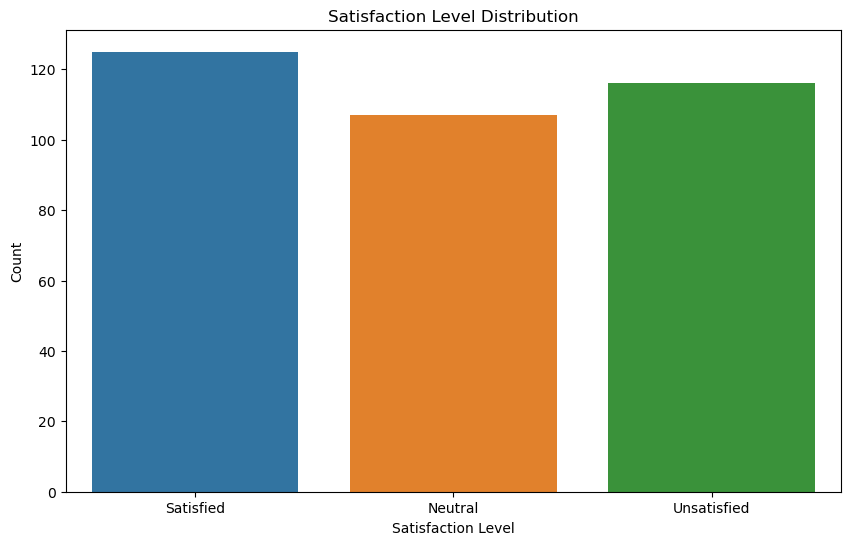

In [48]:
# Satisfaction Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction Level', data=data)
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


In [50]:
# Check for missing values
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [56]:
# One-Hot Encoding for Gender, City, and Membership Type
data = pd.get_dummies(data, columns=['Gender', 'City', 'Membership Type', 'Satisfaction Level'], drop_first=True)


In [58]:
data['Discount Applied'] = data['Discount Applied'].astype(int)


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

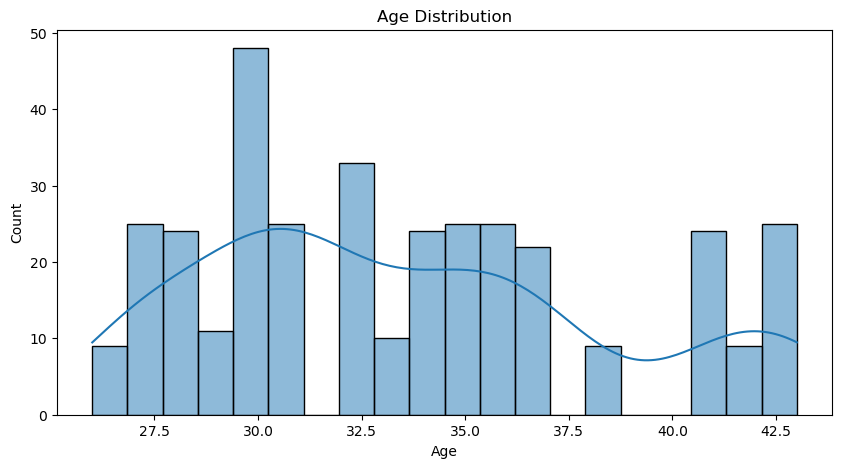

In [61]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

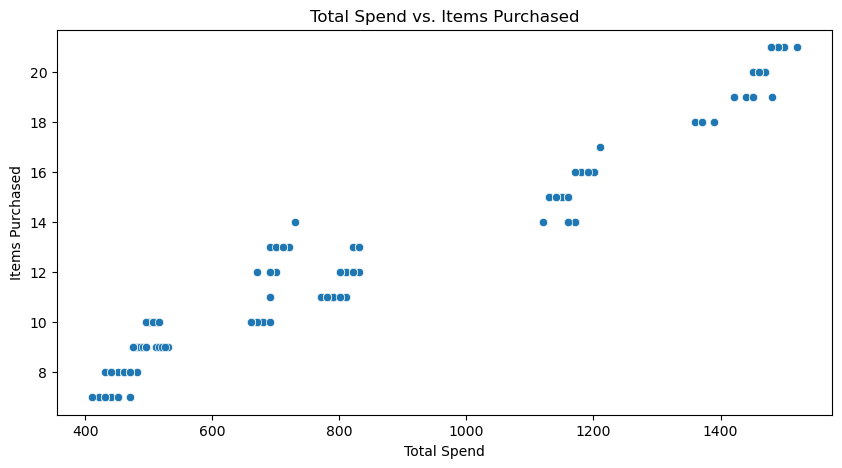

In [65]:
# Total Spend vs. Items Purchased
plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'Total Spend', y = 'Items Purchased' ,data = data)
plt.title('Total Spend vs. Items Purchased')
plt.show()


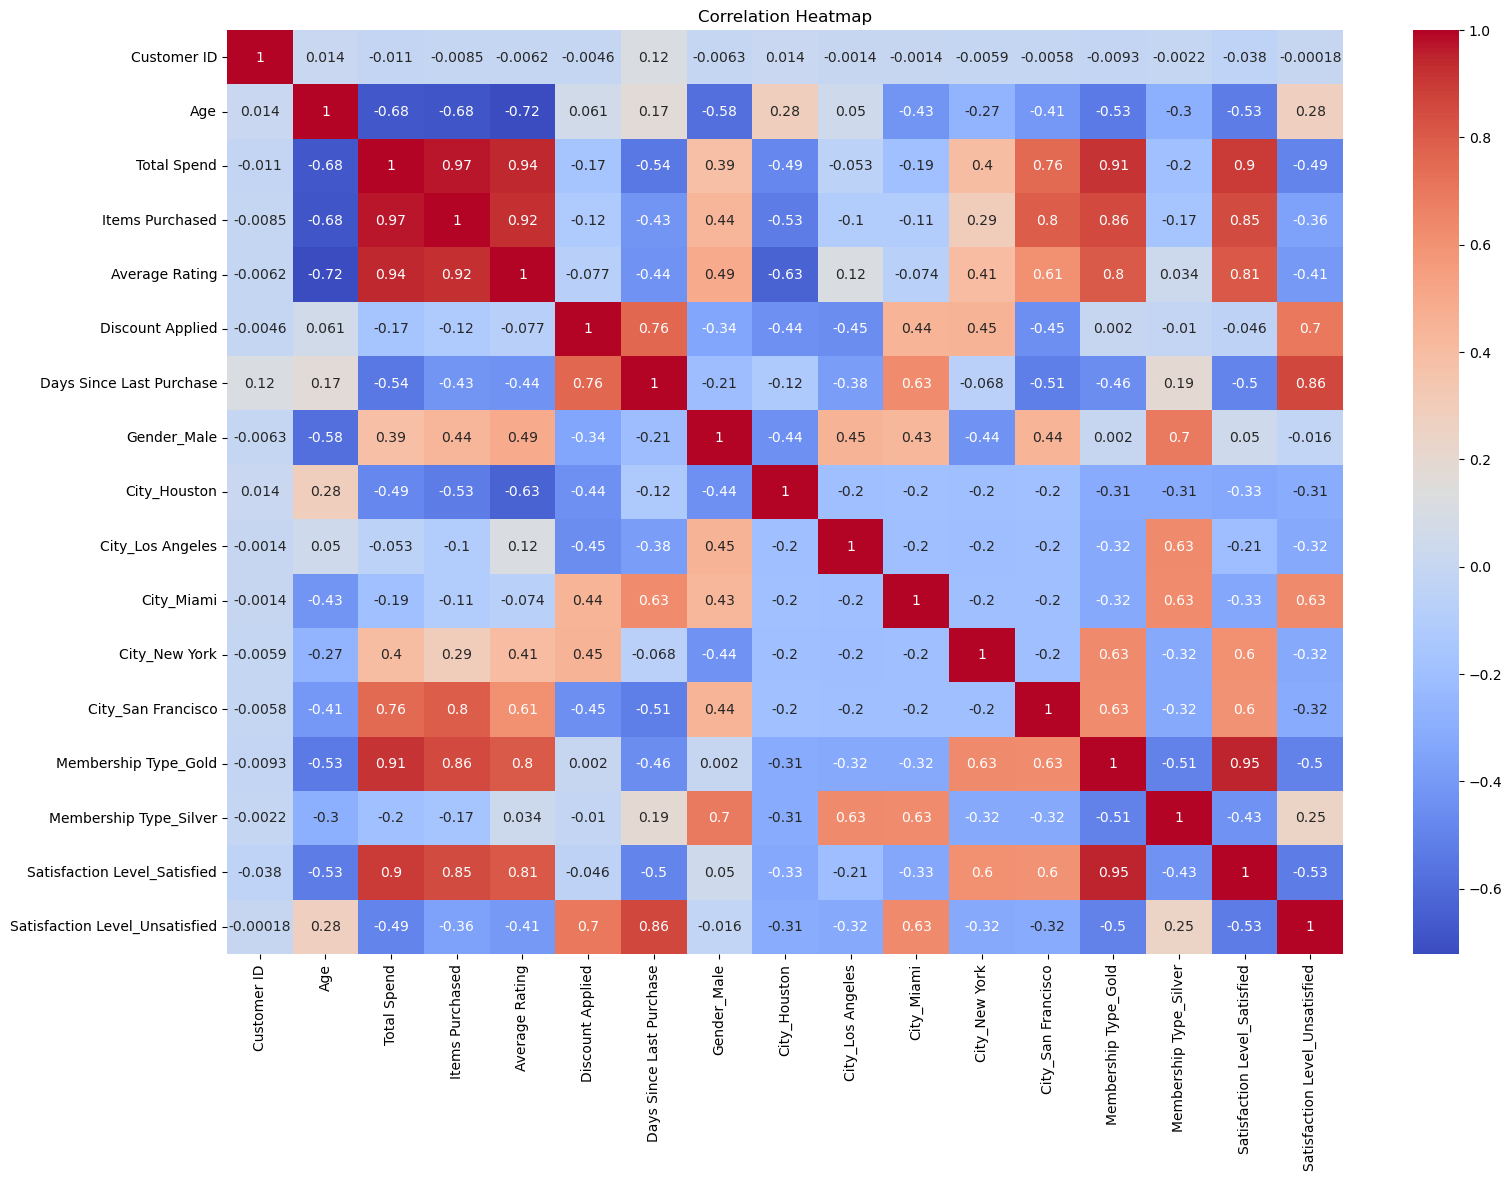

In [68]:
# Correlation Heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [70]:
# Recency, Frequency, Monetary Value Calculation
data['Recency'] = data['Days Since Last Purchase']
data['Frequency'] = data['Items Purchased']
data['Monetary'] = data['Total Spend']

In [71]:
# Create RFM Scores
data['R_Score'] = pd.qcut(data['Recency'], 4, labels=[4, 3, 2, 1])
data['F_Score'] = pd.qcut(data['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
data['M_Score'] = pd.qcut(data['Monetary'], 4, labels=[1, 2, 3, 4])
data['RFM_Segment'] = data['R_Score'].astype(str) + data['F_Score'].astype(str) + data['M_Score'].astype(str)
data['RFM_Score'] = data[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

Clustering and Segmentation

a. Standardize the Data

In [72]:
from sklearn.preprocessing import StandardScaler


In [74]:
# Select features for clustering
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']
data_scaled = StandardScaler().fit_transform(data[features])

b. K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans



In [75]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

D:\Anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

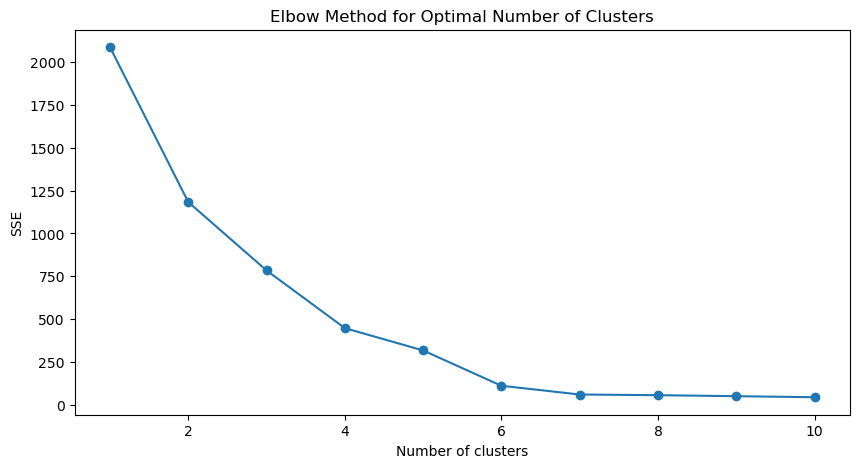

In [76]:
# Plot the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [81]:
# Summary statistics for each cluster (selecting only numerical columns)
numerical_columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'RFM_Score']
cluster_summary = data.groupby('Cluster')[numerical_columns].mean()
print(cluster_summary)

               Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                            
0        35.373913   631.237391         9.686957        3.694783   
1        29.120690  1459.772414        20.000000        4.808621   
2        29.837607   929.741026        13.470085        4.238462   
3        42.017241   499.882759         9.413793        3.456897   

         Discount Applied  Days Since Last Purchase  RFM_Score  
Cluster                                                         
0                     0.0                 18.930435   6.808696  
1                     0.0                 11.172414  12.000000  
2                     1.0                 34.957265   7.658120  
3                     1.0                 40.465517   4.017241  


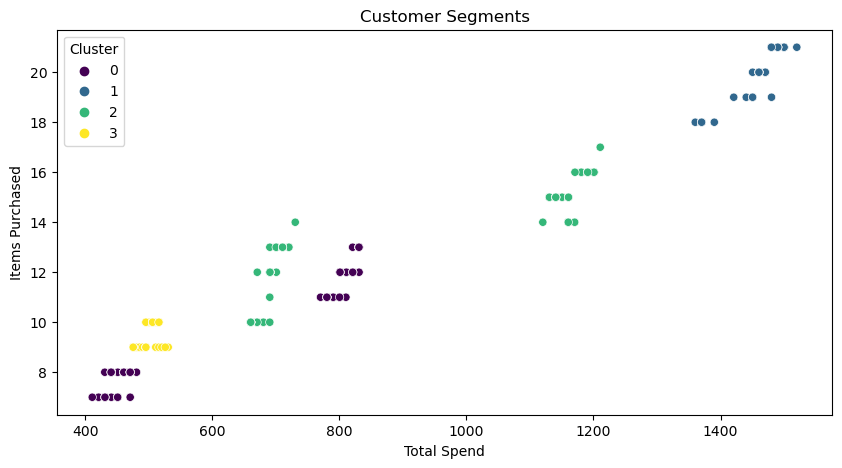

In [82]:
# Visualize clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Total Spend', y='Items Purchased', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()

# Summary Statistics Interpretation


#### Cluster 0:


Age: 35.37

Total Spend: 631.24

Items Purchased: 9.69

Average Rating: 3.69

Discount Applied: 0.0

Days Since Last Purchase: 18.93

RFM Score: 6.81


#### Cluster 1:


Age: 29.12

Total Spend: 1459.77

Items Purchased: 20.00

Average Rating: 4.81

Discount Applied: 0.0

Days Since Last Purchase: 11.17

RFM Score: 12.00


#### Cluster 2:


Age: 29.84

Total Spend: 929.74

Items Purchased: 13.47

Average Rating: 4.24

Discount Applied: 1.0

Days Since Last Purchase: 34.96

RFM Score: 7.66


#### Cluster 3:


Age: 42.02

Total Spend: 499.88

Items Purchased: 9.41

Average Rating: 3.46

Discount Applied: 1.0

Days Since Last Purchase: 40.47

RFM Score: 4.02

## Personalized Marketing Strategies

#### Cluster 0 - Moderate Spenders, Infrequent Buyers:

##### Characteristics : 
Moderate total spend, moderate number of items purchased, average satisfaction, no discounts used, moderate recency.
##### Strategy:
* Engagement Campaigns: Encourage more frequent purchases through personalized emails and reminders about new products.
* Loyalty Programs: Introduce a loyalty program that rewards customers for regular purchases.
* Product Recommendations: Use personalized recommendations to highlight products similar to their past purchases.

#### Cluster 1 - High-Value Customers:

##### Characteristics: 
High total spend, high number of items purchased, very high satisfaction, no discounts used, recent purchases.
##### Strategy:
* Exclusive Offers: Provide exclusive deals and early access to new products.
* VIP Programs: Enroll them in a VIP program with additional benefits and personalized services.
* Personalized Communication: Send personalized thank you notes and updates on new arrivals or special events.

#### Cluster 2 - Discount Seekers, High Spenders:

##### Characteristics: 
High total spend, moderate number of items purchased, high satisfaction, discounts used, less recent purchases.
##### Strategy:
* Targeted Discounts: Continue offering targeted discounts and promotions to encourage more frequent purchases.
* Re-engagement Campaigns: Use re-engagement campaigns to bring them back, offering special discounts for returning customers.
* Seasonal Promotions: Create seasonal promotions that appeal to their purchasing habits and preferences.

#### Cluster 3 - Older, Low Spenders, Infrequent Buyers:

##### Characteristics: 
Older age group, low total spend, moderate number of items purchased, average satisfaction, discounts used, least recent purchases.
##### Strategy:
* Reactivation Campaigns: Send reactivation campaigns with special offers and discounts to encourage them to return.
* Surveys and Feedback: Collect feedback to understand why they are not purchasing frequently and address their concerns.
* Simplified Experience: Simplify the shopping experience for this segment, possibly highlighting ease of use and convenience.

### Implementing Strategies

1. Integrate with CRM:

Use CRM tools to segment customers and implement these personalized strategies.
Automate the sending of personalized emails, offers, and reminders based on customer segments.

2. Track and Analyze:

Monitor the performance of each strategy using key metrics like open rates, click-through rates, conversion rates, and overall customer satisfaction.
Continuously analyze the data to refine and improve the strategies.

3. Feedback Loop:

Establish a feedback loop to gather customer opinions and experiences.
Use this feedback to adjust and optimize marketing strategies continually.